In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('titanic.csv')

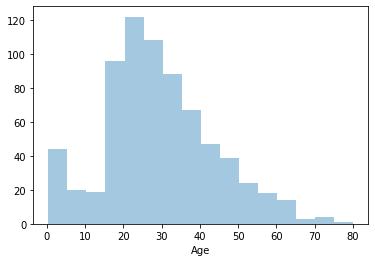

In [4]:
sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

In [10]:
ls_ages = df['Age'].dropna()
ages_20_25 = 0
for age in ls_ages:
    if age >= 20.315 and age <= 25.28875:
        ages_20_25 += 1
        
print(ages_20_25)

122


In [16]:
len(ls_ages)

714

In [12]:
122/714

0.17086834733893558

In [13]:
ages_20_25/len(ls_ages)

0.17086834733893558

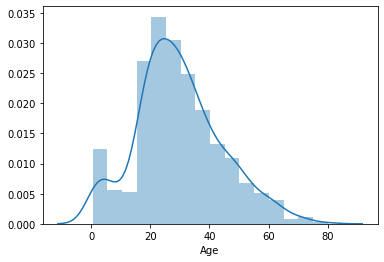

In [17]:
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

In [18]:
ages_20_25/len(ls_ages)/5

0.03417366946778712

In [22]:
# probability that passener in titanic is younger than 40?
ages_20_25/(len(ls_ages))

0.17086834733893558

In [24]:
ages_40 = 0
for age in ls_ages:
    if age <= 40.0:
        ages_40 += 1

In [25]:
ages_40/(len(ls_ages) * 40)

0.019747899159663865

In [26]:
def count_lower(ls, threshold):
    count = 0
    for item in ls:
        if item < threshold:
            count += 1
    return count

In [37]:
def cdf_list(ls, step_size):
    thresh_range = range(int(min(ls)), int(max(ls)), step_size)
    for step in thresh_range:
        print(count_lower(ls, step)/len(ls))
    

In [44]:
cd = cdf_list(df['Age'].dropna().values, 5)

0.0
0.056022408963585436
0.08683473389355742
0.1092436974789916
0.22969187675070027
0.38935574229691877
0.5378151260504201
0.6708683473389355
0.7717086834733894
0.8389355742296919
0.896358543417367
0.9411764705882353
0.9635854341736695
0.9845938375350141
0.9901960784313726
0.9985994397759104


ValueError: x, y, and format string must not be None

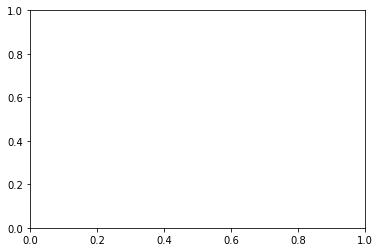

In [45]:
import matplotlib.pyplot as plt 
plt.plot(int(np.min(ls_ages)), int(np.max(ls_ages)), cd)

AttributeError: 'Rectangle' object has no property 'kde_kws'

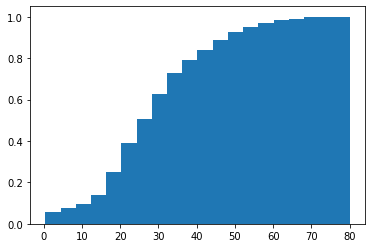

In [48]:
sns.distplot(df['Age'].dropna(), hist_kws=dict(cumulative=True, kde_kws=dict(culmulative=True)))

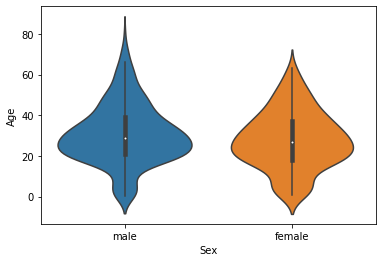

In [49]:
# PDF using violin plot
sns.violinplot(x="Sex", y="Age", data=df)

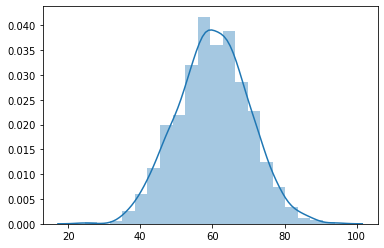

In [52]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20) # plots a pdf of a, using a histogram

In [53]:
len(a)

1000

In [56]:
np.sum(a)/1000


60.15264372571062

In [57]:
# question about interbval from pdf histogram:
# compute the area under the curve between the two intervals
count = 0
for i in a:
    if i <= 70 and i >= 50:
        count += 1
count
    

676

In [58]:
count / len(a)

0.676

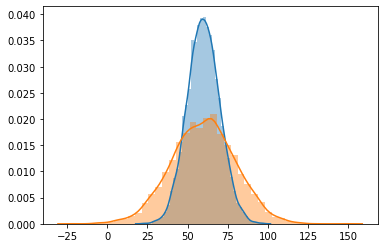

In [65]:
a = np.random.normal(60, 10, 10_000)
sns.distplot(a, hist=True, kde=True, bins=40)
b = np.random.normal(60, 20, 10_000)
sns.distplot(b, hist=True, kde=True, bins=40)

In [66]:
grade = np.random.normal(60, 10, 100)

In [68]:
# how many students got more than 70 in the above dataset?
# = 1 - cdf of this dataset, at 70
len(grade) - count_lower(grade, 70)

20

In [69]:
from scipy.stats import norm
print(norm.sf(70, loc=60, scale=10))

0.15865525393145707


In [70]:
1 - norm.cdf(70, loc=60, scale=10)  # survival value

0.15865525393145707

In [137]:
a = np.random.normal(60, 10, 10_000)
b = np.random.normal(60, 20, 10_000)

In [138]:
count_a = 0
for eleme in a:
    if eleme <= 70.0 and eleme >= 50.0:
        count_a += 1
count_a

6805

In [139]:
6816/10_000

0.6816

In [140]:
count_b = 0
for eleme in b:
    if eleme <= 80.0 and eleme >= 40.0:
        count_b += 1
count_b

6792

In [141]:
6823/10_000

0.6823

In [142]:
from scipy.stats import norm 
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10) # another way to show that 68% of data in sample 
# falls between mean - std and mean + std

0.6826894921370859

In [143]:
avg = np.mean(a)
std = np.std(a)
for i in range(len(a)):
    a[i] -= avg
    a[i] /= std

In [144]:
np.mean(a)

1.5631940186722203e-16

In [145]:
np.std(a)

1.0